## Homework 2

###### Guidelines to be followed (we can discuss and adjust of course, but to be consistent in the way we code)

- Jupyter Notebook should **not contain too much code** (the less code is stored here the better since it makes things much clearer)
- Pure code should be stored in **seperate .py files** (easier to review and better for version control)
- Lets try to **comment** everything we do from the beginning so that we don't have to do this boring and annoying work at the end
- Every time we have the chance of **plotting** some information lets try to do it (data visualisation is very important)

#### Some useful data set information

- Each row represents an event. There are several different types of events however:
    - **View**: A user viewed a product
    - **Cart**: A user added a product to a shopping cart
    - **Removefromcart**: A user removed a product from the shopping cart
    - **Purchase**: A user purchased a product
    
    
- A typical funnel of a client would be (leading to 3 different rows in the dataset: view >> cart >> purchase)


- **event_time**: Time of the event
- **event_type**: Event type (see above for event types)
- **product_id**: Unique identifier of product
- **category_id**: Category ID of product
- **category_code**: Code of category. If product is not a relevant one the category code is left empty (meaningfull missing)
- **brand**: Brand of product (can be missing, I guess this is not a meaningful missing)
- **price**: Float price of product
- **user_id**: Unique identifier of user
- **user_session**: Unique identifier of user session (1 *user_id* can have several *user_session* over time)


- **Example**: User with *userid* during session *usersession* added to shopping cart (*eventtype == cart*) the product *productid* of the brand *brand* of category *categorycode* with a given *price* at a given *event_time* 


**Some useful info**

1. Price is unique by product_id and event_time
    - y =full_data_set.groupby([full_data_set.event_time, full_data_set.product_id]).price.nunique()
    - len(y) == y.sum()

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import library and files

In [61]:
import pickle
import pandas as pd
import functionality as funcs

#### Function loaded from functionality.py

In [2]:
funcs.stupid_function('Hi guys!')

Hi guys!


In [3]:
funcs.new_function(6, 5)

11

#### I recommend storing data as a pickle file (much faster to read and work with)

In [ ]:
Oct_2019_data = pd.read_csv('data/2019-Oct.csv')
Nov_2019_data = pd.read_csv('data/2019-Nov.csv')

#### Save with pickle format

In [ ]:
Oct_2019_data.to_pickle('data/2019_Oct.pickle')
Nov_2019_data.to_pickle('2019_Oct.pickle')

#### Partially read data

In [5]:
Oct_2019_data = pd.read_csv('data/2019-Oct.csv', nrows=10000)
Nov_2019_data = pd.read_csv('data/2019-Nov.csv', nrows=10000)

full_data_set = pd.concat((Oct_2019_data, Nov_2019_data))

#### Basic Data Manipulations

## Research Question 1

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
- How many times, on average, a user views a product before adding it to the cart?
- What’s the probability that products added once to the cart are effectively bought?
- What’s the average time an item stays in the cart before being removed?
- How much time passes on average between the first view time and a purchase/addition to cart?


**Comments**:

Zhibek


## Research Question 2

What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
- Plot the most visited subcategories.
- What are the 10 most sold products per category?


**Comments**:

Nicola


## Research Question 3

For each category, what’s the brand whose prices are higher on average?
- Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
- Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.


**Comments**:

I am doing the average without doing any kind of event_type filter, would this give me the wanted price value? If not I would not know by what event type to filter...
Maybe intuitevly we should do this exercise over unique product_ids (so what is the average price over unique products over brand and category)

**Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.**

Before doing any analysis we have reviewed the columns of interest and have detected that many brands are missing. This is obviously a data issue, but it can still give us relevant information (we can assume that missing brand names are from unknown brands). For this reason we will categorize missing brand values with the value 'unknown_brand'. 

We will group by category and brand, computing the average price. Once we have this result we will sort the resulting average price and keep the first observation of each group.

*Most up-to-date*
1. Replace missing brand values with unknown_brand >> Missing brands might be from not famous brands, therefore these missing observations could still be useful for our client
2. Our data set is organized based on events. We are not interested in the events, we are only interested in the price of the products of the brand (which is unique at product_id and event_time level).
3. A unique price can be obtained by dropping duplicates based on category_id, brand, product_id and event_time.dt.month
4. After dropping all the non-unique rows of category_id, brand, product_id and event_time.dt.month we compute the average price of a product at month level and then compute the average of the resulting price over the whole brand

Question regaring the plot is equal with the only difference that we would first filter the by the category_id


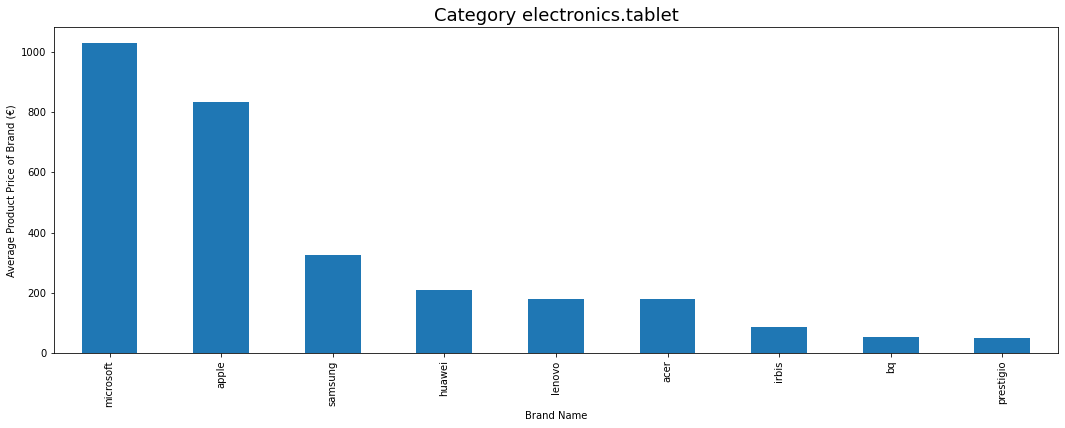

In [62]:
funcs.plot_average_price_brand_category(data_set=full_data_set, 
                                        category_id=2172371436436455782, 
                                        missing_treatment='unknown_brand')

In [68]:
sorted_series, highest_price_brands = funcs.category_brand_highest_price(full_data_set, 'unknown_brand')

In [69]:
sorted_series

category_id          brand    
2053013552259662037  bosch        823.3375
                     buderus      816.9825
                     rinnai       809.5450
                     navien       702.7200
                     teploross    615.1900
                                    ...   
2172371436436455782  acer         178.9000
                     irbis         88.6300
                     bq            53.8800
                     prestigio     51.2200
2173216765583032544  jordan       102.7100
Name: price, Length: 2006, dtype: float64

In [70]:
highest_price_brands

category_id          brand      
2053013552259662037  bosch           823.337500
2053013552293216471  firman          256.800000
2053013552326770905  electrolux      154.420000
2053013552351936731  klima           411.830000
2053013552385491165  xiaomi          175.207500
                                       ...     
2165087460176953468  berkut          275.425000
2166064855264526831  conceptclub      23.423333
2172371122509578610  atomic          257.150000
2172371436436455782  microsoft      1029.370000
2173216765583032544  jordan          102.710000
Name: price, Length: 453, dtype: float64

## Research Question 4

How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
- Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).


**Comments**:

Zhibek

## Research Question 5

In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.


**Comments**:

Nicola

## Research Question 6

The conversion rate of a product is given by the purchase rate over the number of times the product has been visited. What's the conversion rate of your online store?
- Find the overall conversion rate of your store.
- Plot the purchase rate of each category and show the conversion rate of each category in decreasing order.


**Comments**:

1. Overall conversion rate computes the overall purchases the online store had to the number of views the online store
2. Estimate the number of views and number of purchases at category level and estimate the purchase rate from these values.
    - Is there any difference between purchase and conversion rate? (I am assuming they are the same for this exercise)
    - If this is the case the plot is not very ilustrative to be honest, think of a better ilustration strategy

In [7]:
conversion_rate = funcs.conversion_rate(full_data_set)
conversion_rate

0.0112

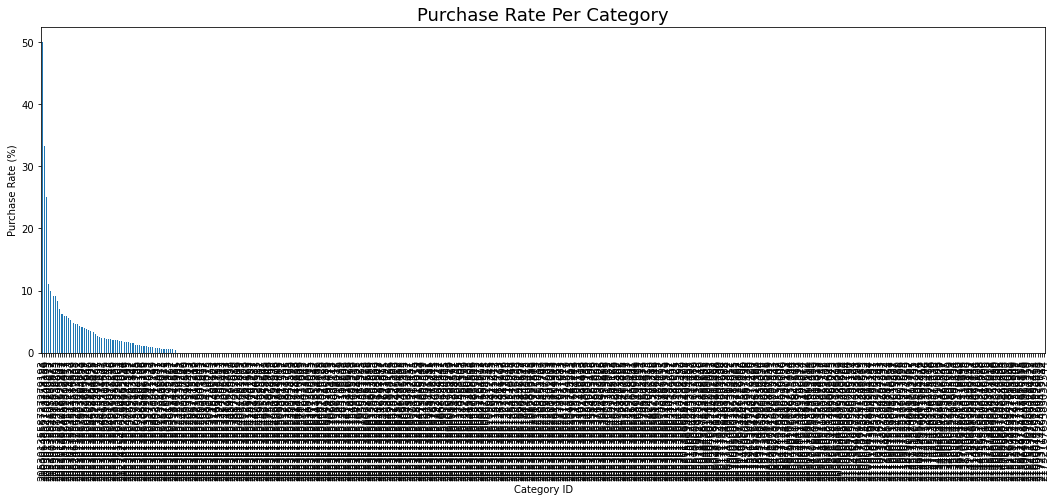

In [34]:
sorted_conversion_rates_per_category = funcs.conversion_rate_per_category(full_data_set)

## Research Question 7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
- Prove that the pareto principle applies to your store.


**Comments**:

???

# Testing (to be deleted)

In [44]:
import numpy as np

products = ["A", "B", "C", "D"]
stores = ["foo", "bar", "baz"]
n = 30

product_list = [products[i] for i in np.random.randint(0, len(products), n)]
store_list = [stores[i] for i in np.random.randint(0, len(stores), n)]
rating_list = np.random.random(n) * 5
sales_list = np.random.random(n) * 10000

df = pd.DataFrame(
    {'store': store_list, 
     'product': product_list, 
     'sales': sales_list, 
     'rating': rating_list})

df = df[['store', 'product', 'sales', 'rating']]

df[:5]

,store,product,sales,rating
0,foo,D,5565.198466,3.948512
1,foo,D,2141.260589,2.377342
2,baz,D,8749.898473,3.858861
3,baz,C,5394.298011,1.293631
4,foo,B,2175.260471,4.354824


In [46]:
dfg = df.groupby(['store', 'product']).agg({'sales': ['sum', 'count'], 
                                            'rating': 'mean'})

In [47]:
g = dfg[('rating', 'mean')].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(2))
g

store  product
bar    A          4.116625
       D          3.194661
baz    A          4.129558
       D          2.484517
foo    A          3.033121
       D          2.515723
Name: (rating, mean), dtype: float64

In [50]:
g = dfg.groupby(level=0, group_keys=False).apply(
      lambda x: x.sort_values(('rating', 'mean'), ascending=False))

In [51]:
g

sales          rating
                        sum count      mean
store product                              
bar   A         9079.742666     2  4.116625
      D         5873.133116     1  3.194661
      C         4615.841542     1  3.051975
      B        34219.787665     5  2.966798
baz   A         9686.920961     2  4.129558
      D        17992.595965     3  2.484517
      B         9565.853369     1  1.689803
      C        11590.757861     2  1.161413
foo   A        10657.294428     2  3.033121
      D        15350.923437     3  2.515723
      C        21667.973638     4  2.443271
      B        15351.671350     4  1.925846

In [54]:
test.groupby(level=0, group_keys=False).apply(
      lambda x: x.sort_values(ascending=False))

category_id          brand    
2053013552259662037  bosch        823.3375
                     buderus      816.9825
                     rinnai       809.5450
                     navien       702.7200
                     teploross    615.1900
                                    ...   
2172371436436455782  acer         178.9000
                     irbis         88.6300
                     bq            53.8800
                     prestigio     51.2200
2173216765583032544  jordan       102.7100
Name: price, Length: 2006, dtype: float64